In [50]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('csvfiler/60x60x23.csv', sep=',', names=['PosX', 'PosY', 'PosZ', 'A', 'B', 'C', 'Z'])
data


,PosX,PosY,PosZ,A,B,C,Z
0,-299.998,-299.998,230.0,1890,530,456,13
1,-297.277,-299.998,230.0,1888,574,462,13
2,-297.222,-299.998,230.0,1888,574,462,13
3,-293.840,-299.998,230.0,1944,546,478,13
4,-293.683,-299.998,230.0,1944,546,478,13
...,...,...,...,...,...,...,...
1048571,-23.620,9.998,0.0,2014,1886,791,35262
1048572,-23.524,9.998,0.0,2014,1886,791,35262
1048573,-20.223,9.998,0.0,2014,1886,791,35262
1048574,-20.107,9.998,0.0,1858,1600,708,35595


Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


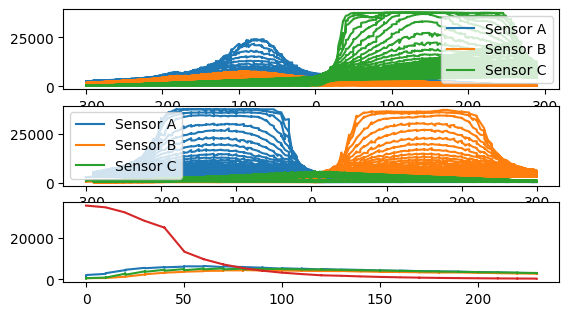

In [51]:
import pandas as pd
df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

# data = data[data['posz'] ==  00]

# data = data[data['posy'] <  .5]
# data = data[data['posy'] > -.5]

data = data[data['posy'] <  .5]
data = data[data['posy'] > -.5]


plt.subplot(411)
plt.plot(data["posx"],data["a"],label="Sensor A")
plt.plot(data["posx"],data["b"],label="Sensor B")
plt.plot(data["posx"],data["c"],label="Sensor C")
plt.legend()

# plt.plot(data["posx"],data["z"],label="Sensor Z")

data= df_.copy(deep=True)

# data = data[data['posz'] ==  00]

data = data[data['posx'] <  .5]
data = data[data['posx'] > -.5]

# data = data[data['posx'] <  .5]
# data = data[data['posx'] > -.5]


plt.subplot(412)
plt.plot(data["posy"],data["a"],label="Sensor A")
plt.plot(data["posy"],data["b"],label="Sensor B")
plt.plot(data["posy"],data["c"],label="Sensor C")
# plt.plot(data["posy"],data["z"],label="Sensor Z")
plt.legend()



data= df_.copy(deep=True)

# data = data[data['posz'] ==  00]

data = data[data['posx'] <  .5]
data = data[data['posx'] > -.5]

data = data[data['posy'] <  .5]
data = data[data['posy'] > -.5]

plt.subplot(413, label = "posz")
plt.plot(data["posz"],data["a"],label="Sensor A")
plt.plot(data["posz"],data["b"],label="Sensor B")
plt.plot(data["posz"],data["c"],label="Sensor C")
plt.plot(data["posz"],data["z"],label="Sensor Z")



ERROR I X

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


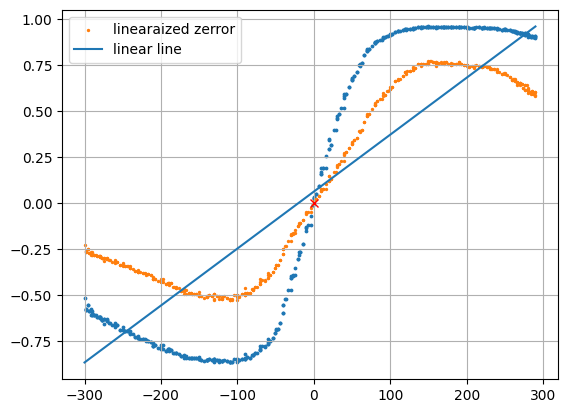

In [52]:
import pandas as pd
from numpy import arctanh


df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

data = data[data['posz'] == 70]
data['posy'] = data['posy']-10


# data = data[data['posx'] <  .5]
# data = data[data['posx'] > -.5]

data = data[data['posy'] <  .5]
data = data[data['posy'] > -.5]

data["xerror"] =(data["c"] - 0.5*( data["a"]+ data["b"]))/(data["c"] + 0.5*( data["a"]+ data["b"]))

plt.scatter( data['posx'],data['xerror'], s=3)
plt.scatter(data["posx"],0.4*arctanh(data["xerror"]),label="linearaized zerror",s=2)
plt.plot([min(data["posx"]),max(data["posx"])],[min(data["xerror"]),max(data["xerror"])], label = "linear line") ## LINEAR LINE ALONG ERROR 
plt.plot(0,0, marker = "x",markerfacecolor="red",markeredgecolor="red")
plt.grid()
plt.legend()

#plt.xscale('log',base=10) 
# plt.plot(data['posx'],data["c"],label="c")


ERROR X SPLINE TESTING :P

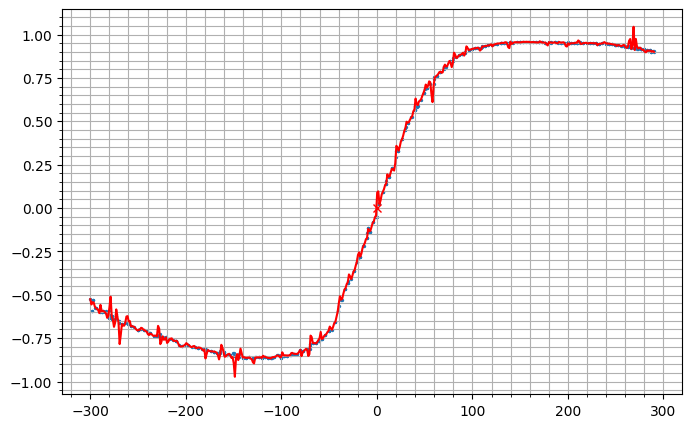

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline  # or UnivariateSpline

# Load and filter your data
df_ = pd.read_csv('csvfiler/60x60x23.csv')
df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]
data['posy'] = data['posy']-10

data = df_.copy(deep=True)
data = data[data['posz'] == 70]
data = data[(data['posy'] < 0.5) & (data['posy'] > -0.5)]

# Create the a+b signal
data["a+b"] = (data["c"] - 0.5 * (data["a"] + data["b"])) / (data["c"] + 0.5 * (data["a"] + data["b"]))

#### SPLINE TESTING
 
data = data.sort_values("posx")

x = data["posx"].values
y = data["a+b"].values
grouped = data.groupby("posx")["a+b"].mean().reset_index()
x = grouped["posx"].values
y = grouped["a+b"].values

x_smooth = np.linspace(x.min(), x.max(), 500)

spline = make_interp_spline(x, y, k=3)  
y_smooth = spline(x_smooth)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="a+b (raw)", s=2)
plt.plot(x_smooth, y_smooth, color='red', linewidth=1.5, label='Interpolating Spline')
plt.plot(0, 0, marker="x", markerfacecolor="red", markeredgecolor="red")
plt.minorticks_on()
plt.grid(which='both')


ERROR I Y

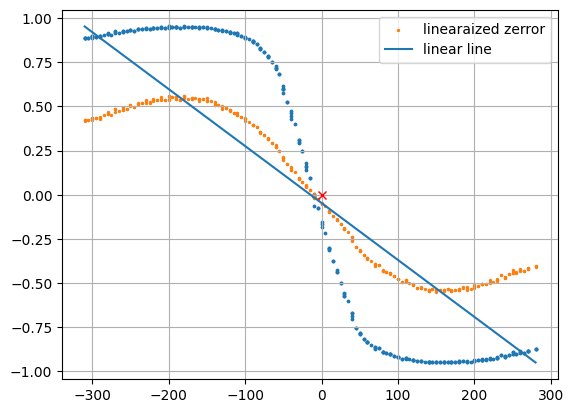

In [54]:
import pandas as pd
from numpy import arctanh

df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

data = df_.copy(deep=True)


data['posy'] = data['posy']-10

data = data[data['posx'] <  .5]
data = data[data['posx'] > -.5]
# data = data[data['posz'] > ]
data = data[data['posz'] == 80]
data["posy"] = data["posy"] -10


###### ERROR CALCULATION
a = data['a']
b = data['b']
aw = 1
bw = 1  ##weight if necessary 
# data['y_error'] = (data['a']-data['b'])/(data['a']+data['b'])
data['yerror'] = (a*aw-b*bw)/(aw*a+b*bw)


#plt.plot(data["posy"],data["y_error"],label="a+b")

plt.scatter( data['posy'],data['yerror'], s=3)
plt.scatter(data["posy"],0.3*arctanh(data["yerror"]),label="linearaized zerror",s=2)
plt.plot([min(data["posy"]),max(data["posy"])],[max(data["yerror"]),min(data["yerror"])], label = "linear line") ## LINEAR LINE ALONG ERROR 
plt.plot(0,0, marker = "x",markerfacecolor="red",markeredgecolor="red")
plt.grid()
plt.legend()



Z ERROR

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


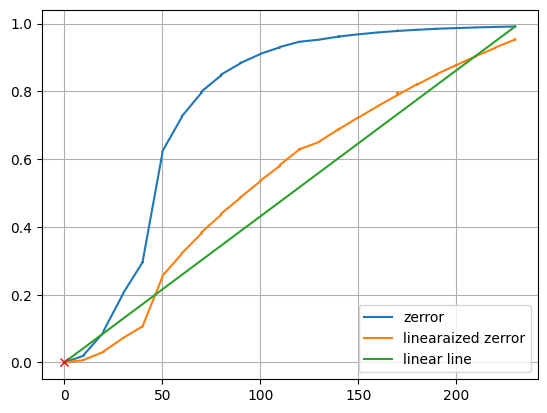

In [55]:
import pandas as pd
from numpy import arctanh
df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

# data = data[data['posz'] < 30]
data["posy"] = data["posy"] -10

data = data[data['posx'] <  .5]
data = data[data['posx'] > -.5]

data = data[data['posy'] <  .5]
data = data[data['posy'] > -.5]

data["zerror"] =(35595-data['z'])/35595
plt.plot(data["posz"],data["zerror"],label="zerror")
plt.plot(data["posz"],0.35*arctanh(data["zerror"]),label="linearaized zerror")
plt.plot([min(data["posz"]),max(data["posz"])],[min(data["zerror"]),max(data["zerror"])], label = "linear line") ## LINEAR LINE ALONG ERROR 
plt.plot(0,0, marker = "x",markerfacecolor="red",markeredgecolor="red")
plt.grid()
plt.legend()


ALL ABC SENSOR VALUES ALONG Z AXIS

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


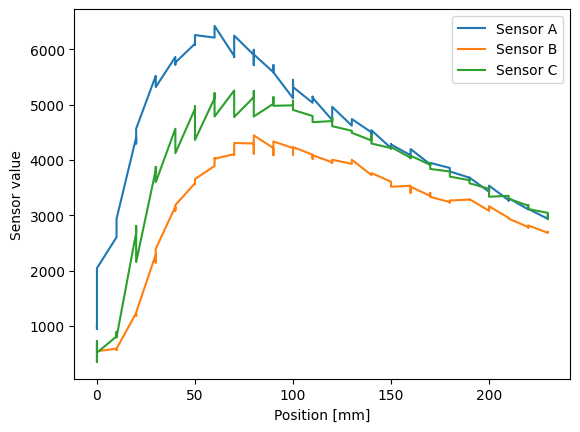

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

# dfp1 = data[data['posz'] ==  10]

data = data[data['posy'] <  .5]
data = data[data['posy'] > -.5]

data = data[data['posx'] <  .5]
data = data[data['posx'] > -.5]

plt.plot(data["posz"],data["a"],label="Sensor A")
plt.plot(data["posz"],data["b"],label="Sensor B")
plt.plot(data["posz"],data["c"],label="Sensor C")
plt.xlabel("Position [mm]")
plt.ylabel("Sensor value")
plt.legend()
# plt.plot(data["posy"],data["z"],label="Sensor Z")


ALL ABC SENSOR VALUES ALONG Z AXIS, JUST SMOOTHER

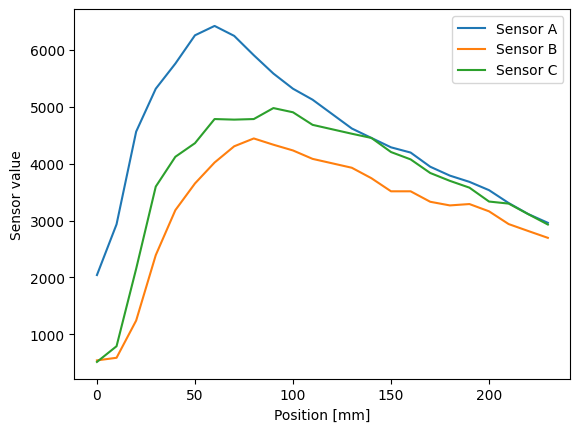

In [57]:
# import pandas as pd
# df_ = pd.read_csv('csvfiler/60x60x23.csv')

# df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

# print(df_.columns)
# data= df_.copy(deep=True)

a = data["a"]
b = data["b"]
c = data["c"]
a = a.iloc[::4]
b = b.iloc[::4]
c = c.iloc[::4]

zz = data["posz"]
zz = zz.iloc[::4]


plt.plot(zz,a,label="Sensor A")
plt.plot(zz,b,label="Sensor B")
plt.plot(zz,c,label="Sensor C")
plt.xlabel("Position [mm]")
plt.ylabel("Sensor value")
plt.legend()

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


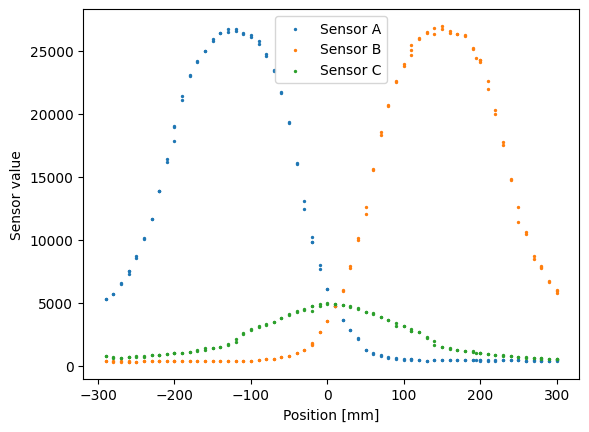

In [58]:
import pandas as pd
df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

data = data[data['posz'] ==  50]

data = data[data['posx'] <  .005]
data = data[data['posx'] > -.005]

# data = data[data['posx'] <  .5]
# data = data[data['posx'] > -.5]
data.to_csv("csvfiler/eksempel.csv")

# plt.plot(data["posx"],data["a"],label="Sensor A")
# plt.plot(data["posx"],data["b"],label="Sensor B")
# plt.plot(data["posx"],data["c"],label="Sensor C")

plt.scatter(data["posy"],data["a"],label="Sensor A", s=2)
plt.scatter(data["posy"],data["b"],label="Sensor B", s=2)
plt.scatter(data["posy"],data["c"],label="Sensor C", s=2)

# plt.plot(data["posy"],data["z"],label="Sensor Z")
plt.xlabel("Position [mm]")
plt.ylabel("Sensor value")
plt.legend()

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


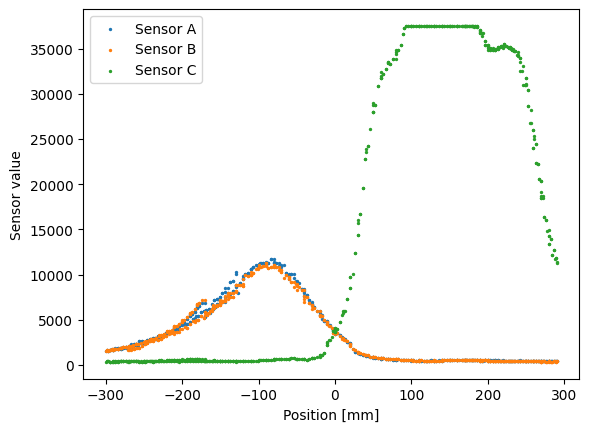

In [59]:
import pandas as pd
df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)



#### FILTERING FOR DATA OF INTEREST
data = data[data['posz'] ==  30]

data = data[data['posy'] <  12.1]
data = data[data['posy'] > 7.1]


# data = data[data['posx'] <  .5]
# data = data[data['posx'] > -.5]
# data.to_csv("csvfiler/eksempel.csv")



#### LINE PLOT 
# plt.plot(data["posx"],data["a"],label="Sensor A")
# plt.plot(data["posx"],data["b"],label="Sensor B")
# plt.plot(data["posx"],data["c"],label="Sensor C")



#### SCATTER PLOT
plt.scatter(data["posx"],data["a"],label="Sensor A", s=2)
plt.scatter(data["posx"],data["b"],label="Sensor B", s=2)
plt.scatter(data["posx"],data["c"],label="Sensor C", s=2)

# plt.plot(data["posy"],data["z"],label="Sensor Z")
plt.xlabel("Position [mm]")
plt.ylabel("Sensor value")
plt.legend()

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


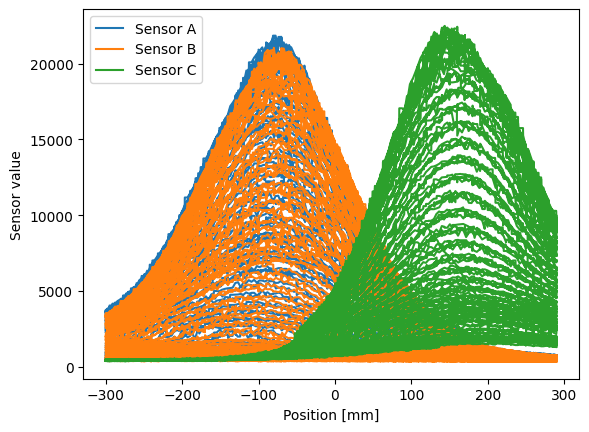

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

data = data[data['posz'] ==  90]  #change integer for different heights
data["posy"] =data['posy'] -10  #for data set calibration error 


# data = data[data['posy'] <  12.1]
# data = data[data['posy'] > 7.1]


# data = data[data['posx'] <  .5]
# data = data[data['posx'] > -.5]
# data.to_csv("csvfiler/eksempel.csv")

plt.plot(data["posx"],data["a"],label="Sensor A")
plt.plot(data["posx"],data["b"],label="Sensor B")
plt.plot(data["posx"],data["c"],label="Sensor C")

# plt.scatter(data["posx"],data["z"],label="Sensor z, posx", s=2)
# plt.scatter(data["posy"],data["z"],label="Sensor z, posy", s=2)
# plt.scatter(data["posz"],data["z"],label="Sensor z, posz", s=2)

# plt.plot(data["posy"],data["z"],label="Sensor Z")
plt.xlabel("Position [mm]")
plt.ylabel("Sensor value")
plt.legend()


Create shifted dataset for data sampling calibration error

In [61]:
import pandas as pd
df_ = pd.read_csv('csvfiler/60x60x23.csv')

df_.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df_.columns)
data= df_.copy(deep=True)

data['posy'] = data['posy'] -10
data.to_csv("csvfiler/datasetmedforflyttety.csv")

Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')


Magnetic data 3D plotter

In [62]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


df = pd.read_csv('csvfiler/60x60x23.csv')


df.columns = ["posx", "posy", "posz", "a", "b", "c", "z"]

print(df.columns)
data= df.copy(deep=True)


######## DATA FILTERING TO NOT OVERLOAD LAPTOP
a = data["a"]
b = data["b"]
c = data["c"]
a = a.iloc[::10]
b = b.iloc[::10]
c = c.iloc[::10]
data = data[data['z']>1000]   # Plot all z values above 1000, for homing centering segment
# data["pos_z"].index
z = data["z"]
z = z.iloc[::10]

xx = data["posx"]
xx = xx.iloc[::10]
yy = data["posy"]
yy = yy.iloc[::10]
zz = data["posz"]
zz = zz.iloc[::10]
############################################3


######## Sensor Z plotter
fig = px.scatter_3d(None, 
                    x=xx, 
                    y=yy, 
                    z=zz,
                    color = z, 
                    color_continuous_scale='viridis', 
                    size_max=2, opacity=0.5,
                    )
fig.update_traces(marker_colorbar=dict(x=0.95, title='a'))
 ##############                       


#### Uncomment this section for A, B, C plots ####

# fig = px.scatter_3d(data, 
#                     x=data['posx'], 
#                     y=data['posy'], 
#                     z=data['posz'],
#                     color = data["z"], 
#                     color_continuous_scale='viridis', 
#                     size_max=2, opacity=0.7,
#                     )

# fig.add_trace(go.Scatter3d(
#     x=data['posx'],
#     y=data['posy'],
#     z=data['b'],
#     mode='markers',
#     marker=dict(size=5,
#                 color=data['b'],
#                 opacity=0.7,
#                 colorbar=dict(x=0.97, title='b')),  # Positioned left of the first colorbar),
#     name="b",
# ))


# fig.add_trace(go.Scatter3d(
#     x=data['posx'],
#     y=data['posy'],
#     z=data['c'],
#     mode='markers',
#     marker=dict(size=5, 
#                 color=data['c'],
#                 opacity=0.7,
#                 colorscale="earth",
#                 colorbar=dict(x=0.92, title='c')),
#     name="c",
# ))



# fig.add_trace(go.Scatter3d(
#     x=[0, 0], 
#     y=[0, 0], 
#     z=[0, max(data['a'])], 
#     # mode='lines',
#     line=dict(color='red', width=4)
# ))

#######################################################




fig.update_layout(
    autosize=False,
    width = 1500,
    height = 1000,
)
fig.write_image("fig1.png")
fig.show()


Index(['posx', 'posy', 'posz', 'a', 'b', 'c', 'z'], dtype='object')
